# Scikit-Learn Pipelines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        # For plotting data
import seaborn as sns                                     # For plotting data
from sklearn.model_selection import train_test_split    # For train/test splits
from sklearn.neighbors import KNeighborsClassifier    # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline                                  # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV      # For optimization

Data from this repository

Ecoli Data Set: https://archive.ics.uci.edu/ml/datasets/Ecoli

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)

Attribute Information:

1. Sequence Name: Accession number for the SWISS-PROT database
2. mcg: McGeoch's method for signal sequence recognition.
3. gvh: von Heijne's method for signal sequence recognition.
4. lip: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
5. chg: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
6. aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
7. alm1: score of the ALOM membrane spanning region prediction program.
8. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

In [3]:
df = pd.read_csv('ecoli.csv')
df.head()

,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [4]:
# The data matrix X
X = df.iloc[:,1:-1]
# The labels
y = (df.iloc[:,-1:])

In [5]:
# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(np.ravel(y))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

In [7]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)

X_train:  (268, 7)
y_train:  (268,)


In [8]:
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_test:  (68, 7)
y_test:  (68,)


In [9]:
X_train.head()

,1,2,3,4,5,6,7
17,0.44,0.27,0.48,0.5,0.55,0.52,0.58
219,0.71,0.52,0.48,0.5,0.64,1.00,0.99
92,0.41,0.43,0.48,0.5,0.50,0.24,0.25
278,0.68,0.63,0.48,0.5,0.73,0.40,0.30
191,0.63,0.65,0.48,0.5,0.66,0.67,0.71


In [10]:
y_train

array([0, 1, 0, 5, 1, 1, 0, 1, 4, 1, 7, 1, 0, 5, 0, 4, 5, 0, 5, 4, 1, 4,
       7, 0, 0, 7, 1, 0, 0, 0, 0, 1, 0, 7, 0, 1, 1, 4, 1, 4, 1, 0, 0, 0,
       4, 4, 0, 7, 7, 0, 4, 0, 0, 0, 0, 1, 7, 4, 0, 1, 0, 1, 1, 0, 1, 1,
       7, 1, 0, 4, 1, 1, 1, 0, 1, 0, 4, 0, 1, 4, 0, 1, 0, 0, 1, 6, 7, 1,
       5, 0, 7, 0, 4, 7, 0, 4, 1, 1, 0, 0, 0, 4, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 4, 1, 7, 0, 7, 0, 0, 4, 0, 7, 0, 0, 0, 0, 1, 1, 7, 7, 3, 0, 7,
       7, 1, 7, 0, 0, 0, 0, 0, 4, 0, 0, 4, 7, 0, 0, 0, 1, 0, 1, 5, 7, 5,
       7, 0, 2, 6, 0, 4, 5, 0, 1, 0, 4, 1, 0, 0, 0, 4, 7, 1, 1, 4, 0, 1,
       6, 0, 5, 0, 5, 1, 0, 1, 0, 0, 0, 7, 0, 7, 1, 0, 0, 1, 4, 1, 1, 1,
       0, 7, 7, 5, 1, 0, 0, 7, 7, 0, 0, 5, 0, 0, 4, 7, 0, 0, 5, 7, 0, 0,
       7, 0, 0, 1, 1, 1, 4, 1, 0, 0, 0, 1, 7, 7, 7, 1, 7, 7, 1, 0, 1, 4,
       0, 5, 0, 0, 1, 7, 1, 7, 0, 1, 7, 0, 0, 0, 7, 4, 5, 1, 0, 1, 4, 7,
       1, 0, 0, 1])

## A Classifier Without a Pipeline and Optimization

In [11]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.8880597014925373
Test set score: 0.8529411764705882


## Setting Up a Machine Learning Pipeline
Scaler: For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().

Feature selector: use a method to discard features, i.e., use VarianceThreshold() for discarding features whose variance is less than a certain defined threshold.

Classifier: select a classifier, i.e., KNeighborsClassifier(), which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.


In [12]:
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

In [13]:
pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8880597014925373
Test set score: 0.8529411764705882


## Optimizing and Tuning the Pipeline
We can search for the best scalers. Instead of just the StandardScaler(), we can try MinMaxScaler(), Normalizer() and MaxAbsScaler().

We can search for the best variance threshold to use in the selector, i.e., VarianceThreshold().

We can search for the best value of k for the KNeighborsClassifier(), the best distance (Minkowski, Euclidean), and the best leaf size

In [14]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
	Normalizer(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
	'classifier__n_neighbors': [1, 3, 5, 7, 10],
	'classifier__p': [1, 2],
	'classifier__leaf_size': [1, 5, 10, 15, 30]
}

##### We pass the parameters to a GridSearchCV object

cv: Number of folds

In [15]:
grid = GridSearchCV(pipe, parameters, cv=5).fit(X_train, y_train)

C:\Users\029492838\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [16]:
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Training set score: 0.8955223880597015
Test set score: 0.8529411764705882


In [17]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 5, 'classifier__p': 2, 'scaler': MinMaxScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier', KNeighborsClassifier(leaf_size=1))])


Create a dataframe with the results

In [18]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [19]:
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__n_neighbors,param_classifier__p,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004054,0.000907,0.003586,0.000388,1,1,1,StandardScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.796296,0.851852,0.814815,0.773585,0.773585,0.802027,0.029315,536
1,0.002786,0.000418,0.003204,0.000384,1,1,1,StandardScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.796296,0.851852,0.814815,0.773585,0.773585,0.802027,0.029315,536
2,0.003521,0.000567,0.002775,0.000444,1,1,1,StandardScaler(),0.01,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.796296,0.851852,0.814815,0.773585,0.773585,0.802027,0.029315,536
3,0.003324,0.000601,0.003388,0.000828,1,1,1,MinMaxScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.833333,0.851852,0.870370,0.773585,0.773585,0.820545,0.040092,471
4,0.003050,0.000882,0.003041,0.000639,1,1,1,MinMaxScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.833333,0.851852,0.870370,0.773585,0.773585,0.820545,0.040092,471


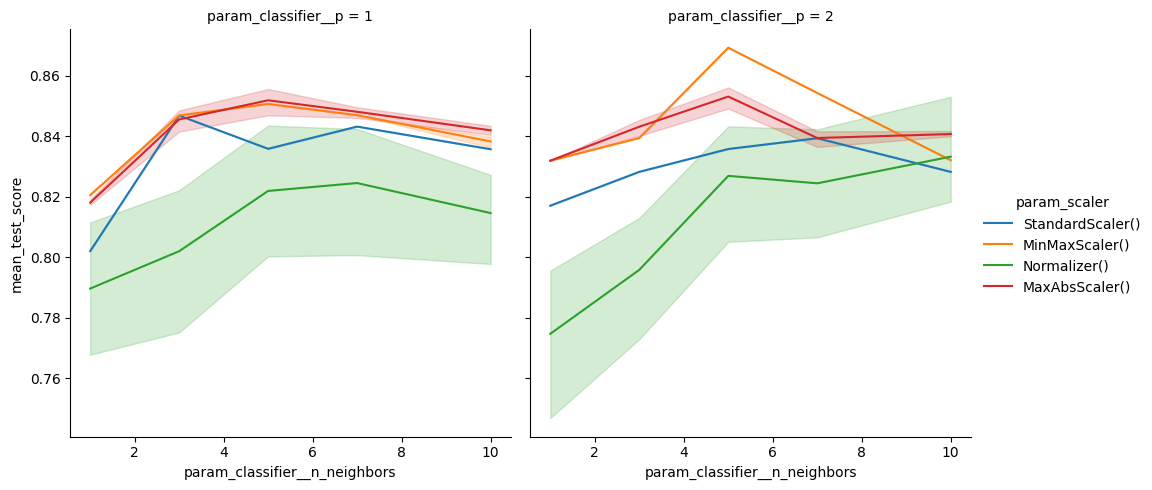

In [20]:
sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__n_neighbors',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__p')
plt.show()

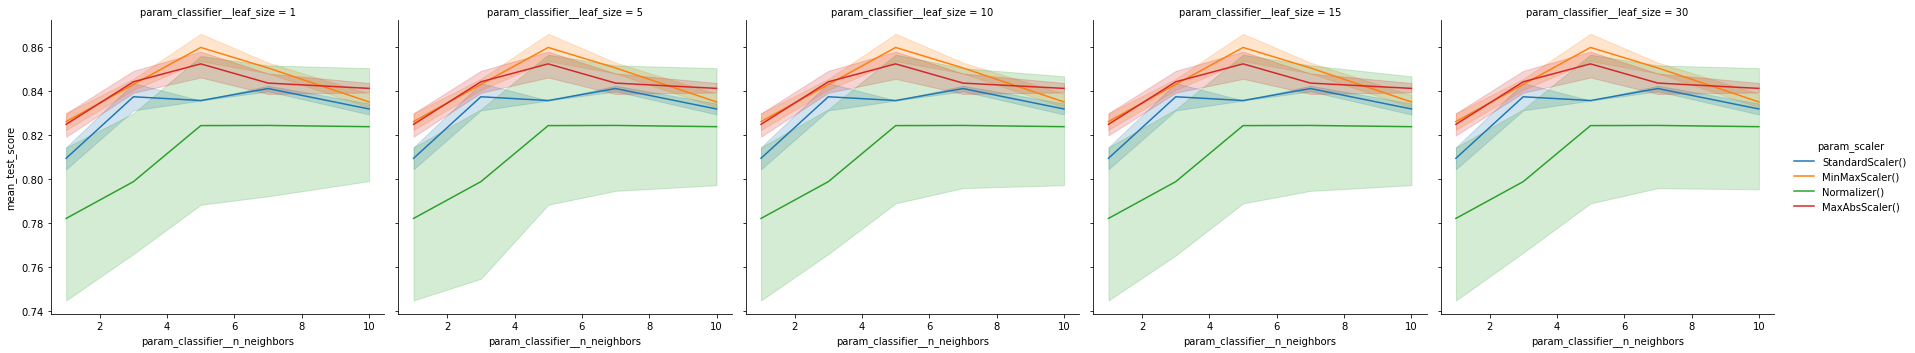

In [35]:
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()